# Модель тесного мира Уотса-Строгатса. Случайные сети

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html

## Вопросы для совместного обсуждения

1\. Обсудите модель тесного мира Уотса-Строгатса

2\. Обсудите конфигурационную модель и модель случайного геометрического графа

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте небольшие сети одного размера (в смысле количества узлов) с разным `p` и визуализируйте их. В качестве `p` рассмотрите несколько значений, равномерно распределенных на отрезке [0, 1]. При визуализации зафиксируйте положение узлов для всех графов.

- [ ] Проверено на семинаре

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
n = 10
p_values = np.linspace(0, 1, 5)
pos = nx.circular_layout(nx.complete_graph(n))

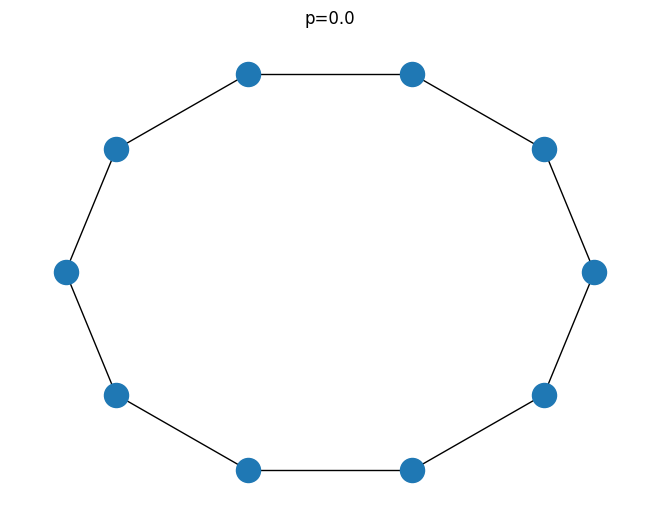

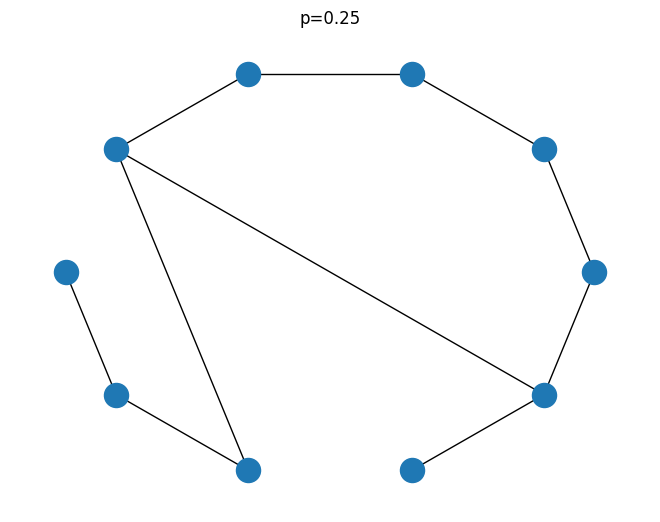

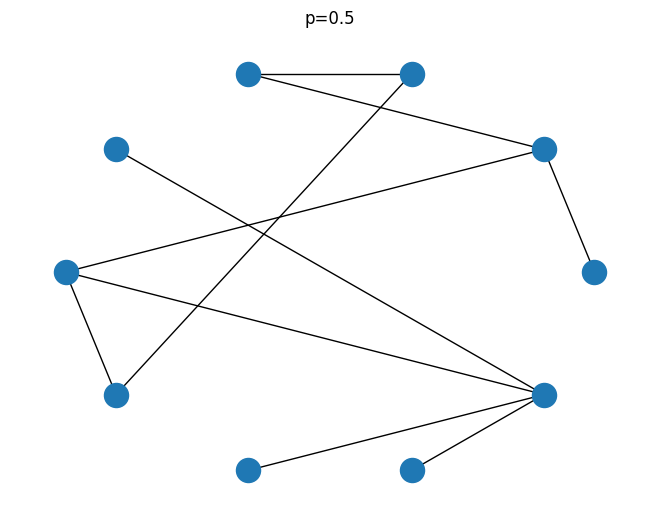

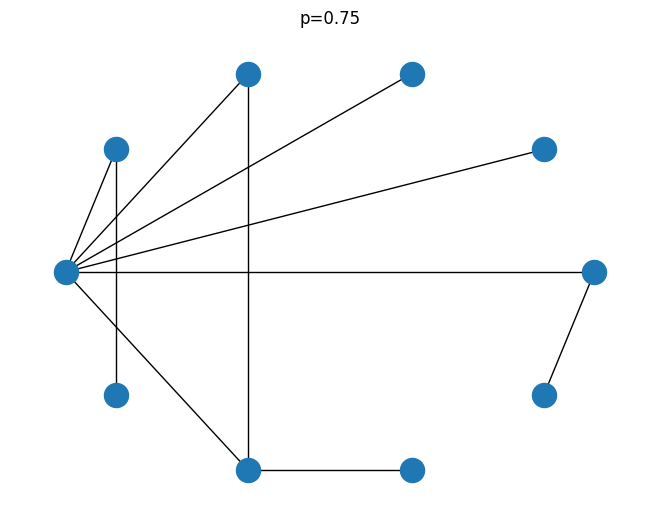

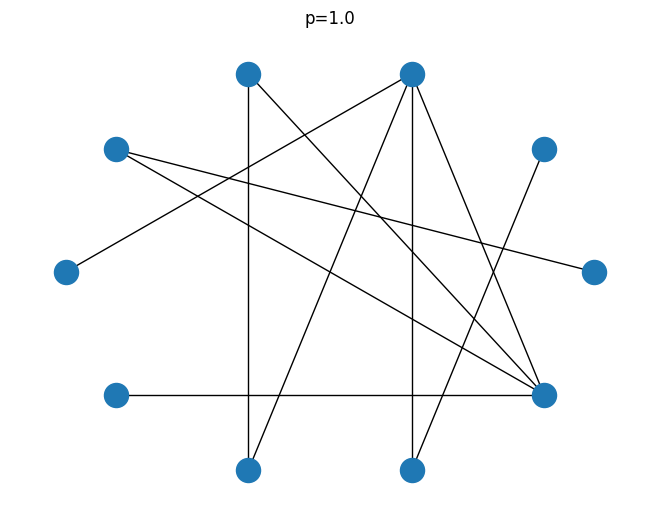

In [6]:
for p in p_values:
    G = nx.watts_strogatz_graph(n=n, p=p, k=3)
    nx.draw(G, pos=pos)
    plt.title(f'p={p}')
    plt.show()


<p class="task" id="2"></p>

2\.  C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте сети с кол-вом узлов порядка 1000 и с разным p. В качестве `p` рассмотрите несколько значений, равномерно распределенных по логарифмической шкале на отрезке $[10^{-4}, 1]$.

Визуализируйте результаты пересвязывания, построив на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания. Обозначьте точки разных графиков различными маркерами и цветами. Добавьте легенду.

- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Реализуйте алгоритм Уотса-Строгатса с целочисленными параметрами  `n` и `p`:

* `n`  - количество узлов в исходной сети (считаем, что исходная сеть является одномерной замкнутой решеткой со степенью узлов 2 - замкнутый путь);
* `p`   - вероятность пересвязывания каждого узла.

Проверьте результат, визуализировав несколько графов одного размера с фиксированными координатами узлов, полученные при разных значениях `p`.

- [ ] Проверено на семинаре

In [39]:
def watts_st(n, p):
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)

    for i in range(n):
        G.add_edge(i, (i + 1) % n)
        G.add_edge(i, (i - 1) % n)

    for i in range(n):
        if np.random.rand() < p:
            new_neighbor = np.random.randint(0, n)
            G.remove_edge(i, (i + 1) % n)
            G.add_edge(i, new_neighbor)

    return G

In [40]:
def vis(G, title):
    plt.figure(figsize=(4, 4))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.title(title)
    plt.show()

In [41]:
n = 5
p_values = [0, 0.1, 0.5, 0.9]

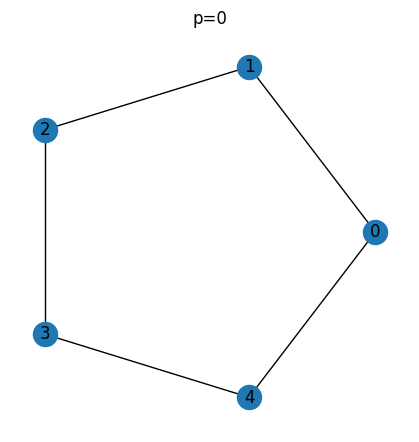

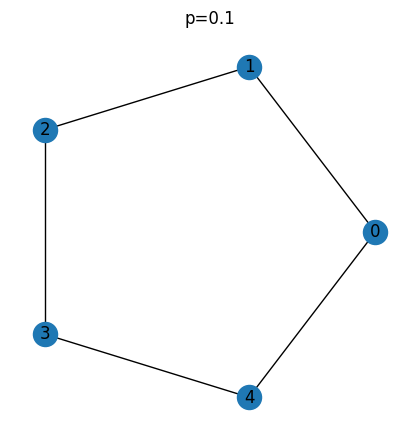

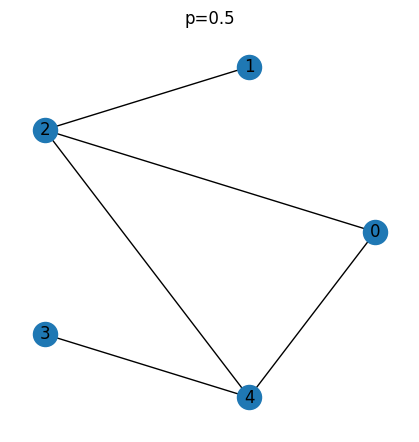

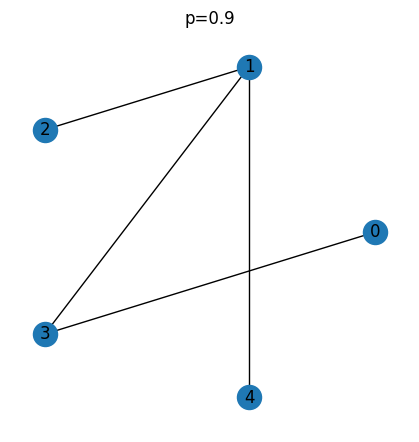

In [54]:
for p in p_values:
    G = watts_st(n, p)
    title = f'p={p}'
    vis(G, title)


<p class="task" id="4"></p>

4\. Создайте неориентированный граф на основе набора данных fb-pages-food с сайта https://networkrepository.com/ . C помощью `nx.configuration_model` постройте рандомизированный аналог данной сети. Визуализируйте исходный и рандомизированный граф рядом. Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

- [ ] Проверено на семинаре

In [88]:
import pandas as pd

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
edges_file = '/content/drive/My Drive/fb-pages-food.edges'
node_file = '/content/drive/My Drive/fb-pages-food.nodes'

In [117]:
edges = pd.read_csv(edges_file, delimiter=',', header=None, names=['source', 'target'])
nodes = pd.read_csv(node_file, delimiter=',')

In [122]:
G = nx.Graph()

In [123]:
for _, row in nodes.iterrows():
    G.add_node(row['new_id'], name=row['name'])


for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])

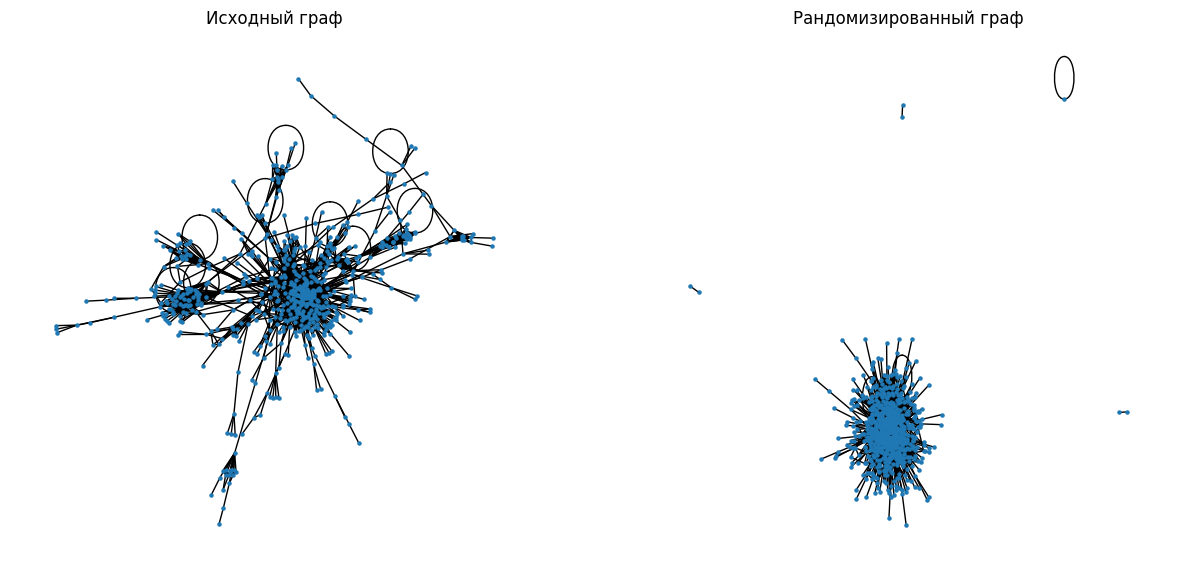

In [124]:
rand_G = nx.configuration_model(list(dict(G.degree()).values()))

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Исходный граф')
nx.draw(G, node_size=5)

plt.subplot(1, 2, 2)
plt.title('Рандомизированный граф')
nx.draw(rand_G, node_size=5)

plt.show()

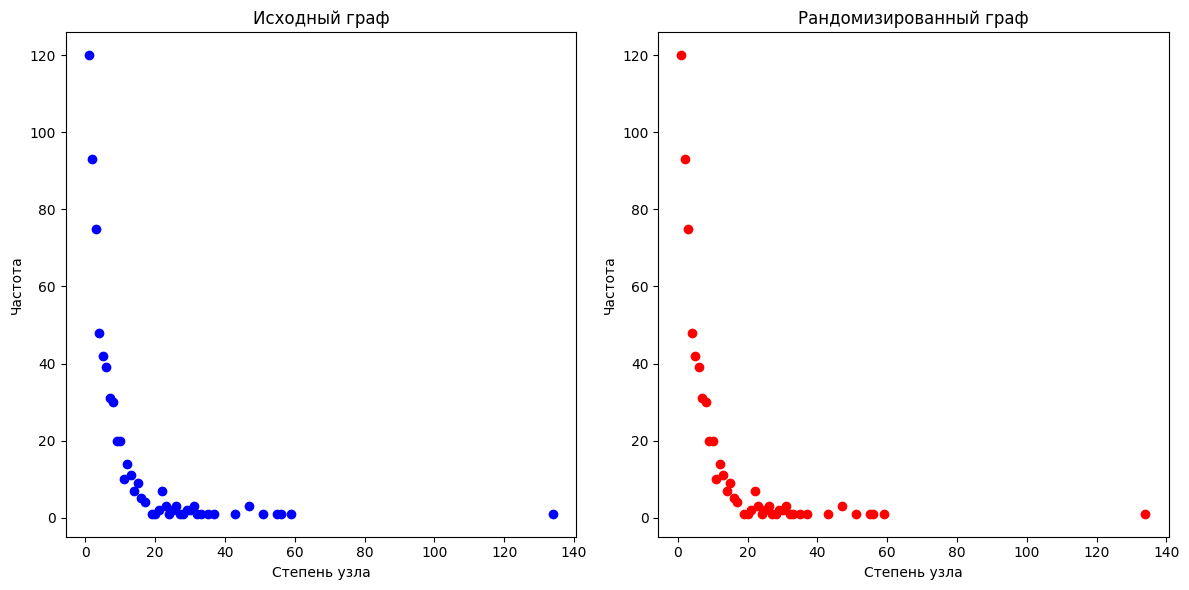

In [125]:
degrees = list(dict(G.degree()).values())
degrees_rand = list(dict(rand_G.degree()).values())

unique_d, counts = np.unique(degrees, return_counts=True)
unique_d_rand, counts_rand = np.unique(degrees_rand, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(unique_d, counts, color='blue')
axs[0].set_xlabel('Степень узла')
axs[0].set_ylabel('Частота')
axs[0].set_title('Исходный граф')

axs[1].scatter(unique_d_rand, counts_rand, color='red')
axs[1].set_xlabel('Степень узла')
axs[1].set_ylabel('Частота')
axs[1].set_title('Рандомизированный граф')

plt.tight_layout()
plt.show()

In [126]:
# совпадают

<p class="task" id="5"></p>

5\. C помощью реализации алгоритма постоения случайного геометрического графа из `networkx` сгенерируйте сеть с кол-вом узлов порядка 500 при радиусе `r=0.2` и $L^2$ метрикой для вычисления расстояния. Визуализируйте полученный граф, уменьшив размер узлов и сделав цвет ребер черным прозрачным (используйте RGBA). Визуализируйте распределение степеней узлов полученного графа.

Повторите решение задачи, использовав $L^1$ метрику для вычисления расстояния. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

In [143]:
n = 500
r = 0.2
G = nx.random_geometric_graph(n, r, p=2)

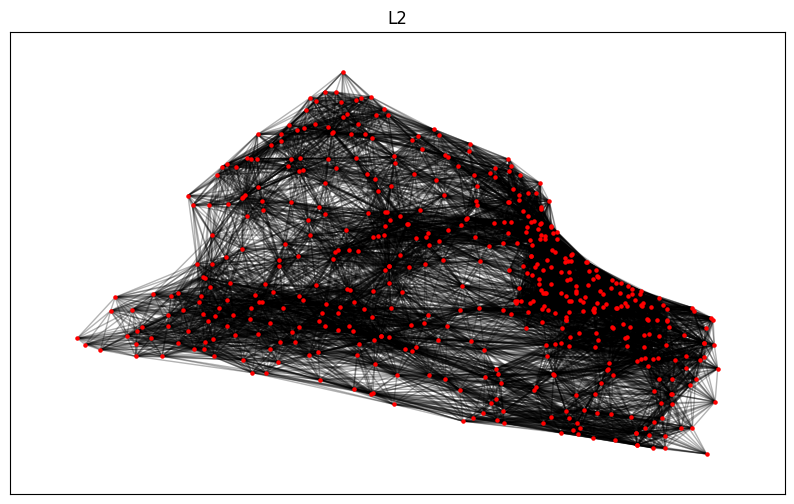

In [144]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, edge_color=(0, 0, 0, 0.3))
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='r')
plt.title("L2")
plt.show()

In [145]:
degrees = list(dict(G.degree()).values())

In [146]:
unique_d, counts = np.unique(degrees, return_counts=True)

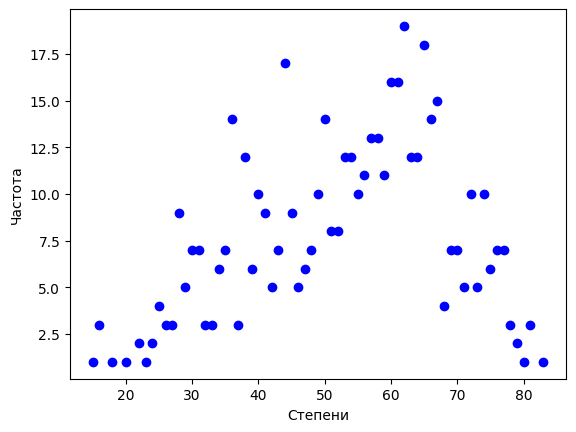

In [147]:
plt.scatter(unique_d, counts, color='blue')
plt.xlabel('Степени')
plt.ylabel('Частота')
plt.show()


In [148]:
n = 500
r = 0.2
G = nx.random_geometric_graph(n, r, p=1)

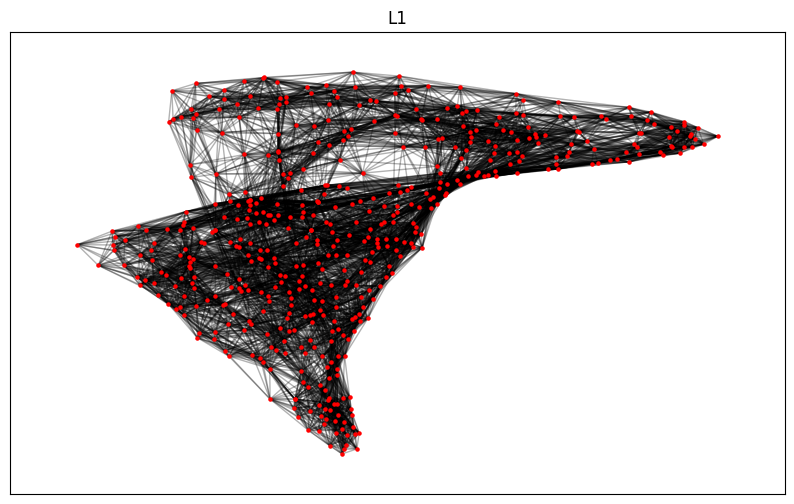

In [149]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, edge_color=(0, 0, 0, 0.3))
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='r')
plt.title("L1")
plt.show()

In [150]:
degrees = list(dict(G.degree()).values())

In [151]:
unique_d, counts = np.unique(degrees, return_counts=True)

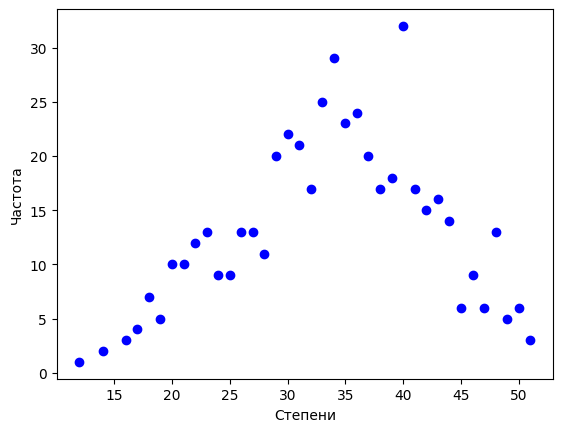

In [152]:
plt.scatter(unique_d, counts, color='blue')
plt.xlabel('Степени')
plt.ylabel('Частота')
plt.show()


In [153]:
# Граф, созданные с использованием L1 метрики, имеет более равномерное распределение узлов